# Explore Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams["figure.figsize"] = (10,10)
df = pd.read_excel('Exercice_SalesData.xlsx')

In [2]:
print df.head()

  SalesOrderNumber  OrderDate    DueDate   ShipDate Sales_Person  \
0          SO43659 2005-07-01 2005-07-13 2005-07-08  Tsvi Reiter   
1          SO43659 2005-07-01 2005-07-13 2005-07-08  Tsvi Reiter   
2          SO43659 2005-07-01 2005-07-13 2005-07-08  Tsvi Reiter   
3          SO43659 2005-07-01 2005-07-13 2005-07-08  Tsvi Reiter   
4          SO43659 2005-07-01 2005-07-13 2005-07-08  Tsvi Reiter   

    Sales_Region Sales_Province Sales_City  Sales_Postal_Code Customer_Code  \
0  United States      Tennessee    Memphis              38103    AW00029825   
1  United States      Tennessee    Memphis              38103    AW00029825   
2  United States      Tennessee    Memphis              38103    AW00029825   
3  United States      Tennessee    Memphis              38103    AW00029825   
4  United States      Tennessee    Memphis              38103    AW00029825   

         ...        LineItem_Id Product_Category Product_Sub_Category  \
0        ...                  1            

## Interesting metrics
interestinng metrics could be the "order turn over" and the "order profit".
turn over is the unit price times the order quantity.
order profit is the order turn over minus the order costs. we ignore other costs such as discount for now ...

In [3]:
df['OrderTurnOver'] = df['UnitPrice'] * df['OrderQty']
df['OrderProfit'] = df['OrderTurnOver'] - (df['Unit_Cost'] * df['OrderQty'])

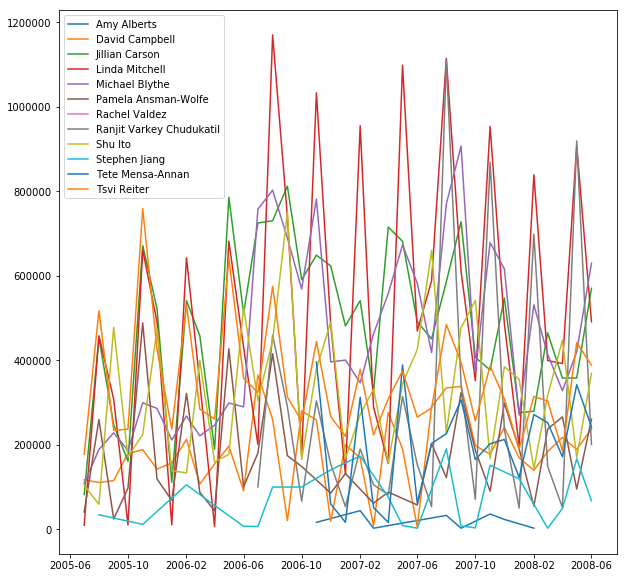

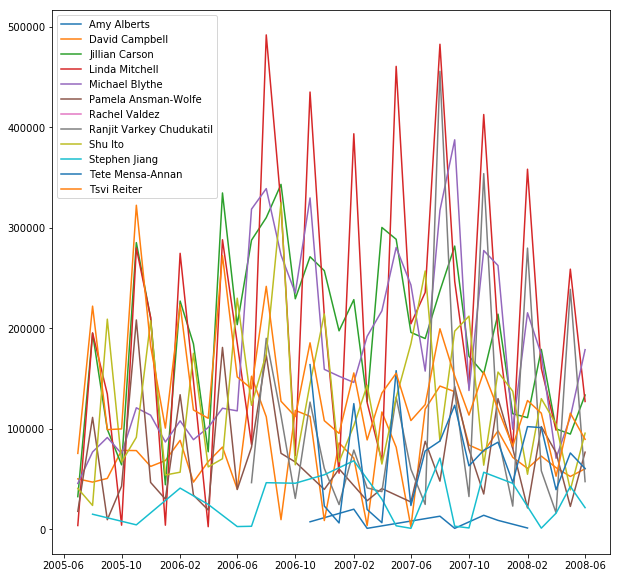

In [4]:
def plot_metrics(metric_name):
    legend = []
    for title, group in df.groupby('Sales_Person'):
        legend.append(title)
        plot_values = defaultdict(list)
        for date, subgroup in group.groupby('OrderDate'):
            plot_values[metric_name].append(subgroup[metric_name].sum())
            plot_values['OrderDate'].append(date)
            plot_values['Sales_Person'].append(title)
        df_plot = pd.DataFrame(plot_values)
        plt.plot(df_plot['OrderDate'],df_plot[metric_name])

    plt.legend(legend, loc='upper left', prop={'size': 10})
    plt.show()

plot_metrics('OrderTurnOver')
plot_metrics('OrderProfit')

we see some volatility in our turn over and profit. we could use some non linear models that could help us forecast turn over and profit.

### turn over and profit per person

we list the total turnover and profit per sales person. we see that since the beginning of our data Linda Mitchell (17,5 million $), Jillian Carson (+- 17,5 million $) and Michial Blyte (+- 16,5 million $) have the highest turn over so far. The same pattern shows with the profit. If we had the turn over and the profit on a monthly basis, this could give us some more information about the performance of the sales persons. To generate a monthly report clone and install the following project: git@github.com:vincentclaes/sales_report.git

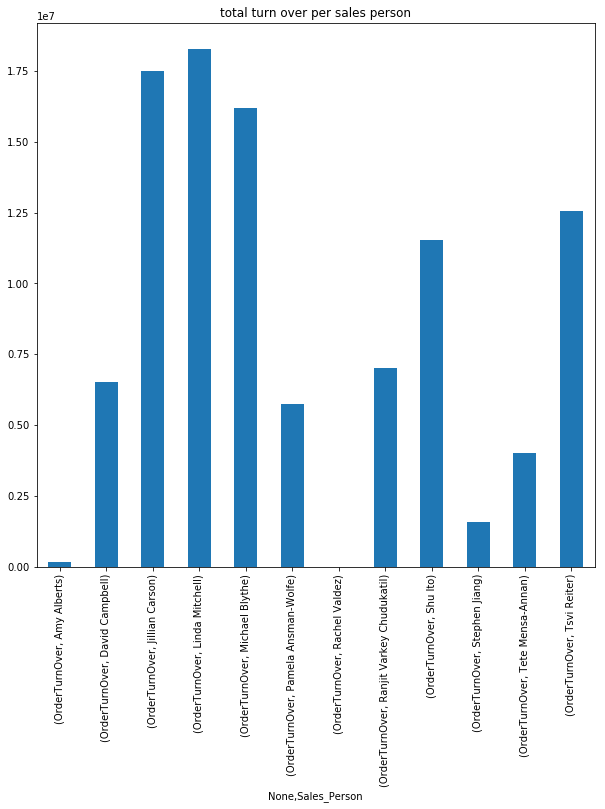

In [5]:
df_plot_to = df[['OrderTurnOver', 'Sales_Person']]
df_plot_to = df_plot_to.groupby('Sales_Person').sum().unstack()
df_plot_to.plot(kind='bar', title='total turn over per sales person')
plt.show()

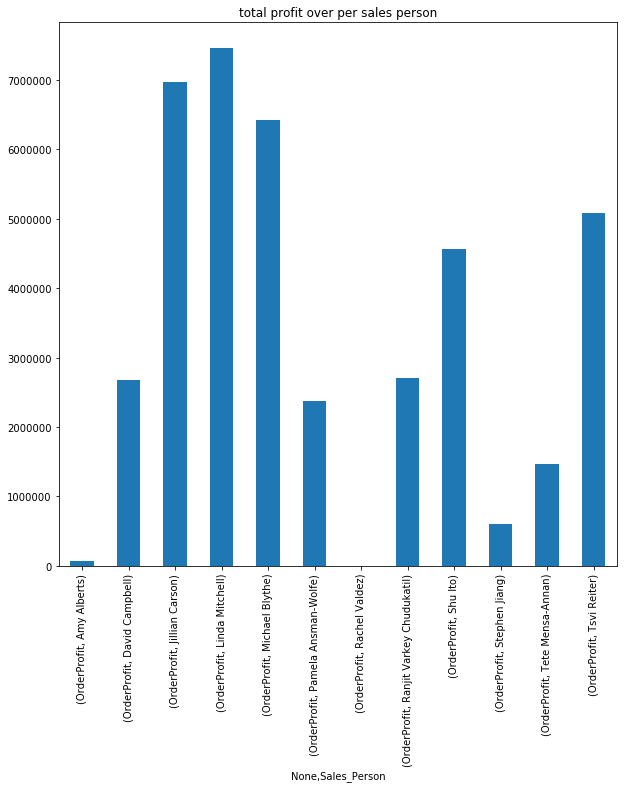

In [6]:
df_plot_profit = df[['OrderProfit', 'Sales_Person']]
df_plot_profit = df_plot_profit.groupby('Sales_Person').sum().unstack()
df_plot_profit.plot(kind='bar', title='total profit over per sales person')
plt.show()